#### ECE5242: Intelligent Autonomous Systems
#### Project 4: Reinforcement Learning
#### Due Date: 4/17/2019 at 1:40pm


#### Yantao Yu, yy849@cornell.edu
#### This project is collaborated with Sijia Gao

### Citations:

#### 1: Deep-reinforcement-learning: Hill-climbing, udacity
#### https://github.com/udacity/deep-reinforcement-learning/tree/master/hill-climbing

#### 2: Deep-reinforcement-learning, Udacity's Deep Reinforcement Learning Nanodegree program
#### https://github.com/udacity/deep-reinforcement-learning

#### 3. Simple reinforcement learning methods to learn CartPole (Hill-climbing, Policy Gradient with TenserFlow), 01 JULY 2016 on research
#### http://kvfrans.com/simple-algoritms-for-solving-cartpole/
#### https://github.com/kvfrans/openai-cartpole

#### 4. EINFORCE (Monte Carlo Policy Gradients) with OpenAI Gym's Cartpole environment
#### https://github.com/udacity/deep-reinforcement-learning/tree/master/reinforce

### Part#3: Acrobot-V1: 
### Train Hill Climbing With Adaptive Noise Scaling to Search Linear Function Approximation of Policy

In [39]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Citation:
# Hill Climbing
# https://github.com/udacity/deep-reinforcement-learning/blob/master/hill-climbing/Hill_Climbing.ipynb

def get_action(weights, state):  
    # define the policy function:
    # input: weights, state  output: action
    
    # calculate the prob for each action pick the action with maximum prob
    temp = np.dot(state, weights)
    probs = np.exp(temp)/sum(np.exp(temp))
    
    # pick the action with maximum prob 
    # action = np.random.choice(2, p=probs) # option 1: stochastic policy
    action = np.argmax(probs)              # option 2: deterministic policy
    return action

In [41]:
def get_discount_rewards(discount_gamma, rewards):
    # calculate discounted rewards
    discounts = []
    for i in range (len(rewards)):
        discounts.append(discount_gamma**i)
    temp = np.multiply(discounts, rewards)
    total_discount_rewards = np.sum(temp)
    return total_discount_rewards 

In [42]:
def update_policy_weights(best_discount_rewards, best_weights, discount_rewards, weights, noise_scale):
    # found better weights
    if discount_rewards >= best_discount_rewards:
        # update best discounted total rewards and linear policy weight matrix
        best_discount_rewards = discount_rewards
        best_weights = weights
        noise_scale = max(1e-3, noise_scale / 2)
        weights += noise_scale * np.random.rand(*weights.shape) 
    else:
        noise_scale = min(2, noise_scale * 2)
        weights = best_weights + noise_scale * np.random.rand(*weights.shape)
    return best_discount_rewards, best_weights, weights

In [43]:
# Citation:
# Hill Climbing
# https://github.com/udacity/deep-reinforcement-learning/blob/master/hill-climbing/Hill_Climbing.ipynb

def hill_climbing(env, num_episodes, max_timestep, discount_gamma, print_time, noise_scale,state_dim):
    # define the hill climbing algorithm with adaptive noise scaling.
    # inputs:
    # env: enviroment for simulation
    # num_episodes (int): maximum number of training episodes
    # max_timestep (int): maximum number of steps for each episode, stop at maximum step 
    # discount_gamma (float): discount rate for future rewards
    # print_time (int): how often to print average score (over last 100 episodes)
    # noise_scale (float): standard deviation of additive noise, increase the scale to faster converge if stucks
    
        
    # initialize the linear function of policy randomly 
    # weights for simple linear policy: size = state_space x action_space
    weights = 1e-4*np.random.rand(state_dim, env.action_space.n)  
    
    # initialize the variables for storage
    best_discount_rewards = -np.Inf
    best_weights = []
    scores_deque = deque(maxlen = 100)
    scores = []

    for i in range(1, num_episodes + 1):
        rewards = []
        state = env.reset()
        for t in range(max_timestep):
            action = get_action(weights,state)
            next_state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
            else:
                state = next_state
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        # calculate total discounted rewards
        discount_rewards = get_discount_rewards(discount_gamma, rewards)

        # update variables
        best_discount_rewards, best_weights, weights = update_policy_weights(best_discount_rewards, best_weights, discount_rewards, weights, noise_scale)

        # print score every period
        if i % print_time == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_deque)))
#         if np.mean(scores_deque)>=195.0:
#             print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
#             policy.w = best_w
#             break
        
    return scores, best_weights

### Run Hill Climbing

In [44]:
# Import and initialize Acrobot V1 environment
env = gym.make('Acrobot-v1')
#env = gym.make('MountainCar-v0')
env.reset()
print('action space:', env.action_space) 
print('observation space:', env.observation_space) 

action space: Discrete(3)
observation space: Box(6,)


In [45]:
num_episodes=5000
max_timestep=1000
discount_gamma=1.0
noise_scale=1e-2
print_time=100

#state_dim=2 #for mountaincar
state_dim=6 #for acrobot

env.seed(0)
np.random.seed(0)
rewards, best_policy_weight = hill_climbing(env, num_episodes, max_timestep, discount_gamma, print_time, noise_scale,state_dim)

Episode 100	Average Score: -278.84
Episode 200	Average Score: -232.39
Episode 300	Average Score: -168.46
Episode 400	Average Score: -99.76
Episode 500	Average Score: -105.39
Episode 600	Average Score: -124.52
Episode 700	Average Score: -108.86
Episode 800	Average Score: -98.70
Episode 900	Average Score: -88.65
Episode 1000	Average Score: -114.40
Episode 1100	Average Score: -168.00
Episode 1200	Average Score: -142.21
Episode 1300	Average Score: -146.06
Episode 1400	Average Score: -158.84
Episode 1500	Average Score: -110.34
Episode 1600	Average Score: -96.91
Episode 1700	Average Score: -90.72
Episode 1800	Average Score: -127.65
Episode 1900	Average Score: -136.40
Episode 2000	Average Score: -139.25
Episode 2100	Average Score: -119.28
Episode 2200	Average Score: -98.31
Episode 2300	Average Score: -87.34
Episode 2400	Average Score: -93.81
Episode 2500	Average Score: -90.71
Episode 2600	Average Score: -91.53
Episode 2700	Average Score: -89.88
Episode 2800	Average Score: -90.14
Episode 2900	

### Plot average rewards vs. episodes

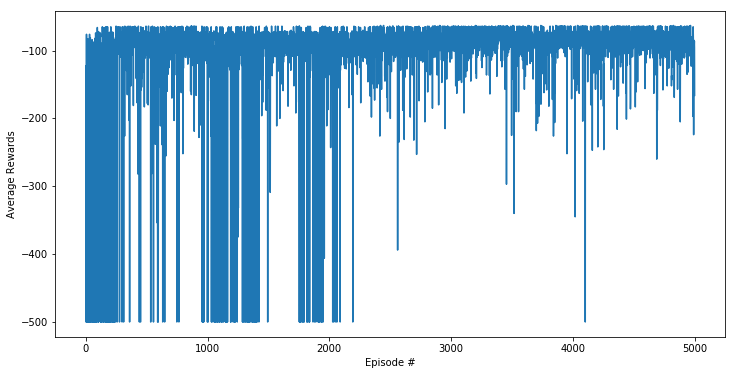

In [46]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(rewards)+1), rewards)
plt.ylabel('Average Rewards')
plt.xlabel('Episode #')
plt.savefig('Acrobot_policy optimization_hill climbing')
plt.show()

### Simulate the agent motion:


In [47]:
# env = gym.make('Acrobot-v1')
state = env.reset()
for t in range(200):
    action = get_action(best_policy_weight, state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
env.close()